In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_error,root_mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [39]:
#Load and prepare data 
hs = pd.read_csv('BostonHousing.csv') 
house = pd.DataFrame(hs)
house.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [40]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [41]:
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
house.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

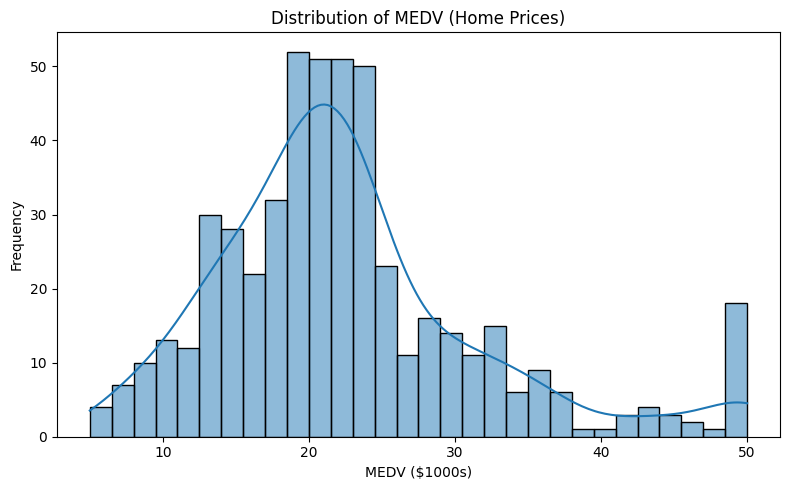

In [43]:
# 	Visualize the distribution of MEDV.

plt.figure(figsize=(8, 5))
sns.histplot(house['medv'], kde=True, bins=30)
plt.title("Distribution of MEDV (Home Prices)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

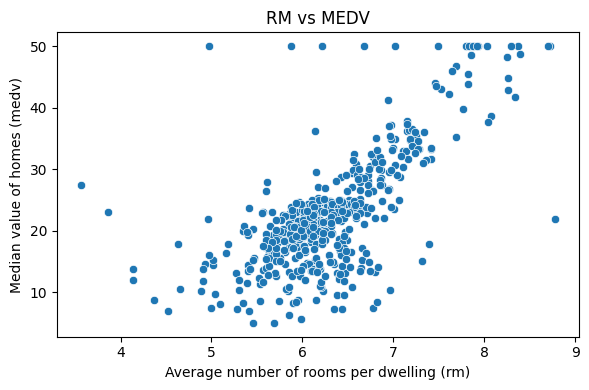

In [44]:
# Scatter plot of RM vs MEDV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='rm', y='medv', data=house)
plt.title("RM vs MEDV")
plt.xlabel("Average number of rooms per dwelling (rm)")
plt.ylabel("Median value of homes (medv)")
plt.tight_layout()
plt.show()

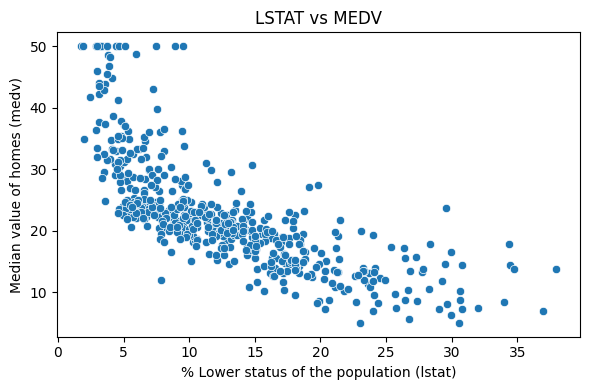

In [45]:
#	Scatter plot of LSTAT vs MEDV

plt.figure(figsize=(6, 4))
sns.scatterplot(x='lstat', y='medv', data=house)
plt.title("LSTAT vs MEDV")
plt.xlabel("% Lower status of the population (lstat)")
plt.ylabel("Median value of homes (medv)")
plt.tight_layout()
plt.show()

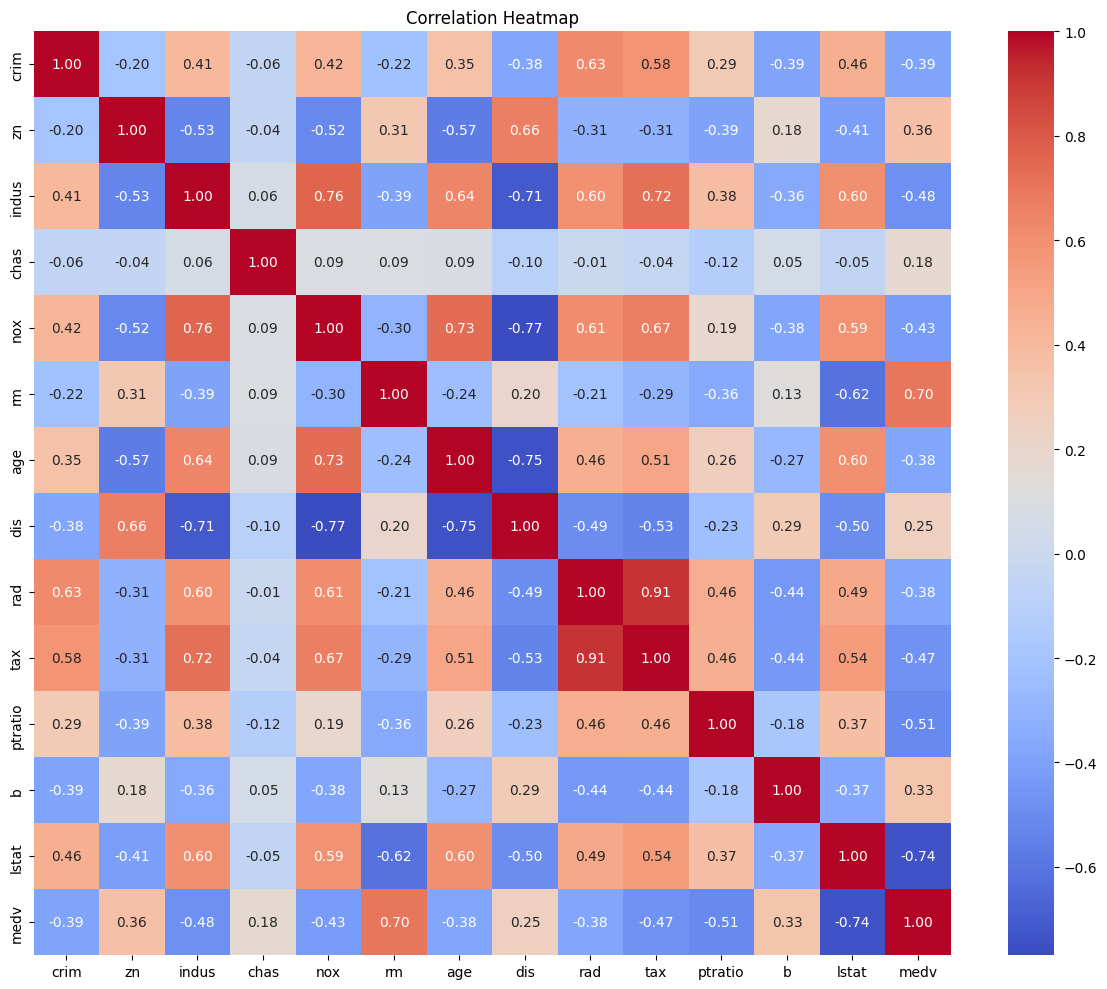

In [46]:
# 	Correlation heatmap of all features

plt.figure(figsize=(12, 10))
corr_matrix = house.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [47]:
# Identify the top 3 most correlated features with MEDV (both positive and negative).

medv_corr = corr_matrix["medv"].sort_values(ascending=False)
print("\nTop 3 Positively Correlated Features with MEDV:")
print(medv_corr[1:4])  

print("\nTop 3 Negatively Correlated Features with MEDV:")
print(medv_corr[-3:])


Top 3 Positively Correlated Features with MEDV:
rm    0.696169
zn    0.360445
b     0.333461
Name: medv, dtype: float64

Top 3 Negatively Correlated Features with MEDV:
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


In [48]:
# Build a Simple Linear Regression Model


# Drop rows with missing values for rm
h = house.dropna(subset=['rm', 'medv'])

# Features and target
X = h[['rm']] # Independent variable
y = h['medv'] # Dependent variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)
print(y_pred[:10])



[ 0.44720595 22.66079175 28.99570923 22.39415517 24.45369292 19.97603717
 15.68226873 24.05833523 19.73698369 19.87489916]


In [49]:
# Build a mple Linear Regression Model

# Drop rows with any missing values
h_m = house.dropna()

# Features and target
X_m = h_m.drop(columns=['medv'])  
y_m = h_m['medv']

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

# Train model
lr_m = LinearRegression()
lr_m.fit(X_train_m, y_train_m)

# Predict
y_predict = lr_m.predict(X_test_m)
print(y_predict[:10]) 


[10.18296392 22.90028638 15.7250715  32.8687425  23.06305477 11.7105764
 12.82823273 19.68402832 21.37844603 11.6664091 ]


In [57]:
# simple linear regression evaluation metrics


mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MQR = mean_squared_error(y_test, y_pred)

print("Intercept:", lr_m.intercept_)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"MQR: {MQR:.2f}")
print("Intercept:", lr.intercept_)
print("Coefficient (slope):", lr.coef_[0])



Intercept: 30.626081825847503
MSE: 40.55
RMSE: 6.37
R²: 0.45
MAE: 4.47
MQR: 40.55
Intercept: -35.07062599191949
Coefficient (slope): 9.194364985224087


In [58]:
# multiple linear regression evaluation metrics

MSE = mean_squared_error(y_test, y_predict)
RMSE = root_mean_squared_error(y_test, y_predict)
R2 = r2_score(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MQR = mean_squared_error(y_test, y_predict)

n = X_test.shape[0]  
k = X_test.shape[1]  
adj_r2 = 1 - (1 - R2) * ((n - 1) / (n - k - 1))

coeff_df = pd.DataFrame(lr_m.coef_, X_m.columns, columns=["Coefficient"])

print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"R²: {R2:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"MQR: {MQR:.2f}")

print(f"Adjusted R²: {adj_r2:.2f}")
print("Intercept:", lr_m.intercept_)
print("\n",coeff_df)

MSE: 20.69
RMSE: 4.55
R²: 0.72
MAE: 3.24
MQR: 20.69
Adjusted R²: 0.72
Intercept: 30.626081825847503

          Coefficient
crim       -0.096870
zn          0.043937
indus       0.040688
chas        2.212366
nox       -14.508323
rm          3.976143
age         0.009847
dis        -1.354379
rad         0.293899
tax        -0.012117
ptratio    -0.868721
b           0.012829
lstat      -0.610251


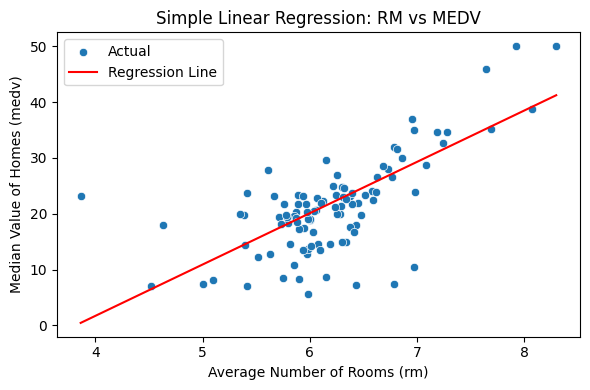

In [52]:
# Plot regression line for Simple Linear Regression (e.g., RM vs MEDV)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test['rm'], y=y_test, label="Actual")
sns.lineplot(x=X_test['rm'], y=y_pred, color='red', label="Regression Line")
plt.title("Simple Linear Regression: RM vs MEDV")
plt.xlabel("Average Number of Rooms (rm)")
plt.ylabel("Median Value of Homes (medv)")
plt.legend()
plt.tight_layout()
plt.show()

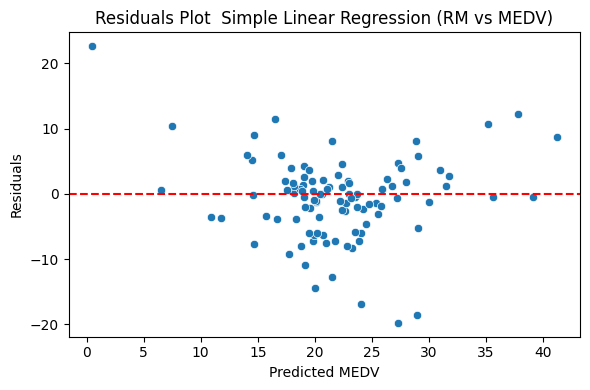

In [53]:
# Residuals plot (Simple Linear Regression)
residuals_s = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals_s)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot  Simple Linear Regression (RM vs MEDV)")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

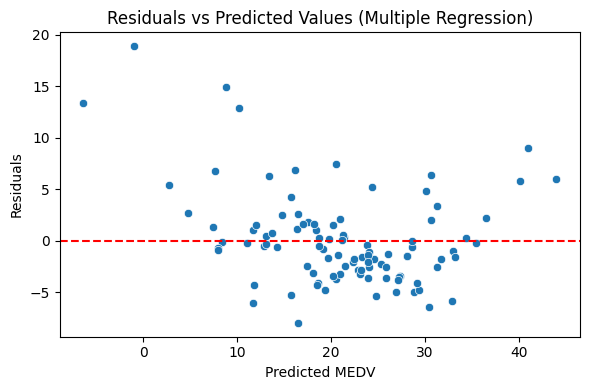

In [54]:
# Residuals plot (multiple Linear Regression)

residuals_m = y_test_m - y_predict

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_predict, y=residuals_m)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (Multiple Regression)")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

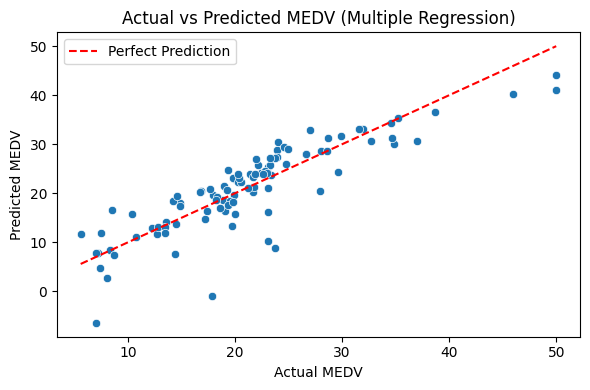

In [55]:
# Actual vs Predicted values plot for multiple regression

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_m, y=y_predict)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted MEDV (Multiple Regression)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.legend()
plt.tight_layout()
plt.show()